# Recommender Systems

In this exercise, we will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings. The dataset consists of ratings on a scale of 1 to 5. The dataset has n_u = 943 users and n_m = 1682 movies.

## Part 1: Loading movie ratings dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [2]:
import re
from scipy.optimize import fmin_cg

In [3]:
movies = scipy.io.loadmat('ex8_movies.mat')
R = movies['R']
Y = movies['Y']

In [4]:
print('Average rating for movie 1 (Toy Story):'.format(np.mean(Y[0,R[0,:]==1])))

Average rating for movie 1 (Toy Story):


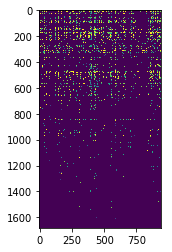

In [5]:
# visualize the ratings matrix 
plt.imshow(Y)
plt.show()

## Part 2: Collaborative Filtering Cost Function and Gradient

We will implement the cost function for collaborative filtering.

In [6]:
# cofiCostFunc returns the cost for the collaborative filtering problem
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, reg_lambda):
    X = params[0:num_movies*num_features].reshape([num_movies, num_features])
    Theta = params[num_movies*num_features:].reshape([num_users, num_features])
    D = R*np.dot(X, Theta.T)-Y
    J = np.sum(D*D)
    J = J/2
    if reg_lambda != 0:
        X_reg = np.sum(X*X)
        Theta_reg = np.sum(Theta*Theta)
        J = J + reg_lambda*X_reg/float(2) + reg_lambda*Theta_reg/float(2)
    return J

In [7]:
# cofiCostFunc returns the gradient for the collaborative filtering problem
def cofiGradFunc(params, Y, R, num_users, num_movies, num_features, reg_lambda):
    X = params[0:num_movies*num_features].reshape([num_movies, num_features])
    Theta = params[num_movies*num_features:].reshape([num_users, num_features])
    D = R*np.dot(X, Theta.T) - Y
    X_grad = np.dot(D, Theta) + reg_lambda*X
    Theta_grad = np.dot(D.T,X) + reg_lambda*Theta
    grad = np.concatenate((X_grad.reshape([num_movies*num_features,]) ,Theta_grad.reshape([num_users*num_features,])))
    return grad

In [8]:
# load pre-trained weights
movieParams = scipy.io.loadmat('ex8_movieParams.mat')
Theta = movieParams['Theta']
X = movieParams['X']

In [9]:
#Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

In [10]:
# evaluate cost and gradient
J = cofiCostFunc(np.concatenate((X.reshape([num_movies*num_features,]) ,Theta.reshape([num_users*num_features,]))), Y, R, num_users, num_movies, num_features, 0)
grad  = cofiGradFunc(np.concatenate((X.reshape([num_movies*num_features,]) ,Theta.reshape([num_users*num_features,]))), Y, R, num_users, num_movies, num_features, 0)

In [11]:
print('Cost at loaded parameters: {}'.format(J))
print('Gradient at loaded parameters: \n {}'.format(grad))

Cost at loaded parameters: 22.2246037257
Gradient at loaded parameters: 
 [ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.
   0.           0.        ]


## Part 3: Collaborative Filtering Cost Regularization and Gradient

In [12]:
reg_lambda = 1.5
J = cofiCostFunc(np.concatenate((X.reshape([num_movies*num_features,]) ,Theta.reshape([num_users*num_features,]))), Y, R, num_users, num_movies, num_features, reg_lambda)
grad  = cofiGradFunc(np.concatenate((X.reshape([num_movies*num_features,]) ,Theta.reshape([num_users*num_features,]))), Y, R, num_users, num_movies, num_features, reg_lambda)

In [13]:
print('Cost at loaded parameters (lambda = 1.5): {}'.format(J))
print('Gradient at loaded parameters (lambda = 1.5): \n {}'.format(grad))

Cost at loaded parameters (lambda = 1.5): 31.3440562443
Gradient at loaded parameters (lambda = 1.5): 
 [ -0.95596339   6.97535514  -0.10861109   0.60308088   2.77421145
   0.25839822   0.12985616   4.0898522   -0.89247334   0.29684395
   1.06300933   0.66738144   0.60252677   4.90185327  -0.19747928
 -10.13985478   2.10136256  -6.76563628  -2.29347024   0.48244098
  -2.99791422  -0.64787484  -0.71820673   1.27006666   1.09289758
  -0.40784086   0.49026541]


## Part 4: Entering ratings for a new user

In [14]:
# loadMovieList() reads the fixed movie list in movie.txt and return a dictionary 
def loadMovieList():
    movies = open('movie_ids.txt').read()
    movie_list = movies.split('\n')
    movieList = {}
    n = 1682
    for i in range(n):
        line = movie_list[i]
        line = re.sub('^[0-9]+', '', line)
        movieList[i] = line.strip()
    return movieList

In [15]:
movieList = loadMovieList()

In [16]:
# initialize my ratings
my_ratings = np.zeros([1682,1])
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [17]:
print('New user ratings:')
for i in range(len(movieList)):
    if my_ratings[i] > 0:
        print('rate is {} for {}'.format(my_ratings[i], movieList[i]))

New user ratings:
rate is [4.] for Toy Story (1995)
rate is [3.] for Twelve Monkeys (1995)
rate is [5.] for Usual Suspects, The (1995)
rate is [4.] for Outbreak (1995)
rate is [5.] for Shawshank Redemption, The (1994)
rate is [3.] for While You Were Sleeping (1995)
rate is [5.] for Forrest Gump (1994)
rate is [2.] for Silence of the Lambs, The (1991)
rate is [4.] for Alien (1979)
rate is [5.] for Die Hard 2 (1990)
rate is [5.] for Sphere (1998)


Part 6: Learning Movie Ratings

In [18]:
# laod data
movies = scipy.io.loadmat('ex8_movies.mat')
R = movies['R']
Y = movies['Y']

In [19]:
# add our own ratings to the data matrix
Y = np.append(my_ratings, Y, 1)
R = np.append((my_ratings !=0),R, 1)

In [20]:
# normalizeRatings() preprocess data by subtracting mean rating for every movie (each row) 
def normalizeRatings(Y, R):
    m = Y.shape[0]
    n = Y.shape[1]
    Ymean = np.sum(Y,1)/(1.0*np.sum(R,1))
    Ynorm = R*(Y - Ymean.reshape([m,1]))
    return Ynorm, Ymean

In [21]:
# normalize ratings
Ynorm, Ymean = normalizeRatings(Y, R)

In [22]:
# useful values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

In [23]:
# set initial parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.concatenate((X.reshape([num_movies*num_features,]),Theta.reshape([num_users*num_features,])))

In [24]:
# train the data
reg_lambda = 10
# fmin_bfgs is very slow for this problem, and so we use fmin_cg
parameters = fmin_cg(cofiCostFunc, initial_parameters, fprime=cofiGradFunc,args=(Ynorm, R, num_users, num_movies, num_features, reg_lambda), maxiter= 100)

         Current function value: 38966.707833
         Iterations: 100
         Function evaluations: 148
         Gradient evaluations: 148


In [25]:
# unfold the returned parameters
X = parameters[0:num_movies*num_features].reshape([num_movies, num_features])
Theta = parameters[num_movies*num_features:].reshape([num_users, num_features])

## Part 5: Recommendation for you

After training the model, we can now make recommendations by computing the predictions matrix

In [26]:
p = np.dot(X, Theta.T)
my_predictions = p[:,0] + Ymean
ix = my_predictions.argsort()[::-1]

In [27]:
print('Top recommendations for new user:')
for i in range(20):
    j = ix[i]
    print('Predict rating {:.1f} for movie {}'.format(my_predictions[j], movieList[j]))

Top recommendations for new user:
Predict rating 5.0 for movie Santa with Muscles (1996)
Predict rating 5.0 for movie Someone Else's America (1995)
Predict rating 5.0 for movie Aiqing wansui (1994)
Predict rating 5.0 for movie Star Kid (1997)
Predict rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predict rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predict rating 5.0 for movie They Made Me a Criminal (1939)
Predict rating 5.0 for movie Prefontaine (1997)
Predict rating 5.0 for movie Saint of Fort Washington, The (1993)
Predict rating 5.0 for movie Great Day in Harlem, A (1994)
Predict rating 4.6 for movie Pather Panchali (1955)
Predict rating 4.6 for movie Star Wars (1977)
Predict rating 4.5 for movie Maya Lin: A Strong Clear Vision (1994)
Predict rating 4.5 for movie Shawshank Redemption, The (1994)
Predict rating 4.5 for movie Wrong Trousers, The (1993)
Predict rating 4.5 for movie Anna (1996)
Predict rating 4.5 for movie Some Mother's Son (1